In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt






from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow import expand_dims
from tensorflow.keras.losses import MeanAbsolutePercentageError
import tensorflow

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from matplotlib import pyplot

2022-09-15 10:39:46.883728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 10:39:47.001378: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-15 10:39:47.005158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-15 10:39:47.005169: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

# LSTM 2017-2018


In [3]:
pwd

'/home/amirel/code/AltInt/Inflation_prediction/notebooks'

In [5]:
df = pd.read_csv('../data/final_df.csv', index_col=0)


In [6]:
df.index = pd.to_datetime(df.index)
df

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_Gas,CPI,RPI,GBP_IRS_2y,GBP_IRS_10y,Nationwide_HPI,RPI YOY
Date,,,,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,84.9,210.1,2.122545,3.757500,300.2,0.142993
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,85.6,211.4,2.129905,3.798333,294.7,0.000000
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,85.8,211.3,2.142045,3.872500,301.1,-0.377181
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,86.0,211.5,2.143250,3.935500,302.9,-1.168224
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,86.4,212.8,2.031900,3.917500,307.2,-1.069270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,120.8,337.1,2.538121,2.240542,538.4,11.659490
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,121.8,340.0,2.933563,2.626558,541.8,11.842105
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,122.5,343.2,2.700779,2.302258,541.0,12.340426


In [7]:
#rpi_lag = pd.read_csv('RPI_lagged.csv')


In [8]:
#rpi_lag

In [9]:
# rpi_lag = rpi_lag.rename({'Date CO1 Comdty': 'Date'}, axis=1)
# rpi_lag = rpi_lag.set_index('Date')


In [10]:
#rpi_lag.index = pd.to_datetime(rpi_lag.index)

In [11]:
#rpi_lag

In [12]:
#new_df = df.join(rpi_lag)

In [13]:
#new_df

In [14]:
# X = new_df.drop(columns = ['RPI', 'CPI', 'RPI YOY'])
# y = new_df['RPI']

X = df.drop(columns = ['RPI', 'CPI', 'RPI YOY'])
y = df['RPI']

In [15]:
X[72:96]

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_Gas,GBP_IRS_2y,GBP_IRS_10y,Nationwide_HPI
Date,,,,,,,,,,,
2015-01-01,32.818125,31.737054,1.516177,1.336264,6641.765238,1339.503656,2495.664852,13.099203,0.858274,1.684729,375.9
2015-02-01,38.343255,32.759207,1.533386,1.362371,6746.840476,1356.232800,2536.801725,13.938965,0.952887,1.856450,375.0
2015-03-01,37.866261,31.635113,1.503677,1.377568,6791.140000,1380.431518,2615.694574,13.821672,0.947216,1.783045,377.9
2015-04-01,40.409377,35.572047,1.512909,1.386036,6886.650952,1381.813784,2620.084413,13.690119,0.923663,1.811432,385.1
2015-05-01,42.505052,36.186768,1.543548,1.384014,6864.994500,1360.216539,2568.111738,13.123988,1.009908,1.971630,389.3
2015-06-01,41.067582,35.885473,1.552386,1.385524,6687.803500,1340.919813,2507.691659,13.023503,1.061182,2.089545,389.1
2015-07-01,36.726002,31.989864,1.545617,1.402913,6625.526087,1353.218881,2518.626151,13.169073,1.119989,2.051104,390.2
2015-08-01,31.196110,29.152671,1.545248,1.376957,6402.255000,1311.027051,2434.955959,12.478583,1.085050,1.958367,389.6
2015-09-01,31.774855,30.721787,1.527609,1.364657,6280.524348,1302.101893,2375.712634,12.595702,1.004023,1.908904,390.2


In [16]:
X_train, y_train = X[:72], y[:72]
X_val, y_val = X[72:96], y[72:96]
X_test, y_test = X[96:108], y[96:108]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((72, 11), (72,), (24, 11), (24,), (12, 11), (12,))

In [17]:
y_train_x = expand_dims(y_train, -1)
y_train_x = expand_dims(y_train_x, -1)

y_train_x.shape

2022-09-15 10:40:11.283264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-15 10:40:11.283333: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-15 10:40:11.283356: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-S0KUROGM): /proc/driver/nvidia/version does not exist
2022-09-15 10:40:11.283846: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([72, 1, 1])

In [18]:
y_val_x = expand_dims(y_val, -1)
y_val_x = expand_dims(y_val_x, -1)

In [19]:
y_val_x.shape

TensorShape([24, 1, 1])

In [20]:
X_test_x = expand_dims(X_test, -2)

In [21]:
X_test_x.shape

TensorShape([12, 1, 11])

In [22]:
X_train_x = expand_dims(X_train, -2)
X_train_x.shape

TensorShape([72, 1, 11])

In [23]:
X_val_x = expand_dims(X_val, -2)
X_val_x.shape

TensorShape([24, 1, 11])

In [24]:
lr_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps= 10_000, decay_rate=0.7)
adam = Adam(learning_rate=lr_scheduler)
es = EarlyStopping(patience=50, restore_best_weights=True)

In [26]:
normalizer = Normalization()
normalizer.adapt(X_train_x)

model1 = Sequential()
model1.add(normalizer)

model1.add(LSTM(units = 100, activation='tanh', return_sequences = True))
model1.add(LSTM(units = 50 , activation='tanh', return_sequences = False))

model1.add(Flatten())

model1.add(Dense(100,activation =  'relu'))
model1.add(Dense(50,activation =  'relu'))
model1.add(Dense(25,activation =  'relu'))

model1.add(Dense(1, activation = 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, None, 11)         23        
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, None, 100)         44800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 100)               5100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                        

In [27]:
mape = MeanAbsolutePercentageError()

In [28]:
model1.compile(loss= mape, optimizer= adam, metrics=['mape'])

In [29]:
model1.fit(X_train_x, y_train,batch_size = 32, validation_data=(X_val_x, y_val), epochs=10000, callbacks = (es))

Epoch 1/10000
3/3 [==============================] - 5s 482ms/step - loss: 99.9919 - mape: 99.9919 - val_loss: 99.9679 - val_mape: 99.9679
Epoch 2/10000
3/3 [==============================] - 0s 28ms/step - loss: 99.9704 - mape: 99.9704 - val_loss: 99.9456 - val_mape: 99.9456
Epoch 3/10000
3/3 [==============================] - 0s 26ms/step - loss: 99.9417 - mape: 99.9417 - val_loss: 99.9190 - val_mape: 99.9190
Epoch 4/10000
3/3 [==============================] - 0s 26ms/step - loss: 99.9033 - mape: 99.9033 - val_loss: 99.8852 - val_mape: 99.8852
Epoch 5/10000
3/3 [==============================] - 0s 26ms/step - loss: 99.8531 - mape: 99.8531 - val_loss: 99.8415 - val_mape: 99.8415
Epoch 6/10000
3/3 [==============================] - 0s 24ms/step - loss: 99.7858 - mape: 99.7858 - val_loss: 99.7872 - val_mape: 99.7872
Epoch 7/10000
3/3 [==============================] - 0s 26ms/step - loss: 99.6920 - mape: 99.6920 - val_loss: 99.7180 - val_mape: 99.7180
Epoch 8/10000
3/3 [==============

3/3 [==============================] - 0s 19ms/step - loss: 7.2388 - mape: 7.2388 - val_loss: 5.6387 - val_mape: 5.6387
Epoch 61/10000
3/3 [==============================] - 0s 20ms/step - loss: 7.0511 - mape: 7.0511 - val_loss: 5.7571 - val_mape: 5.7571
Epoch 62/10000
3/3 [==============================] - 0s 22ms/step - loss: 6.8438 - mape: 6.8438 - val_loss: 5.9137 - val_mape: 5.9137
Epoch 63/10000
3/3 [==============================] - 0s 22ms/step - loss: 6.8180 - mape: 6.8180 - val_loss: 5.5713 - val_mape: 5.5713
Epoch 64/10000
3/3 [==============================] - 0s 24ms/step - loss: 6.4991 - mape: 6.4991 - val_loss: 5.2413 - val_mape: 5.2413
Epoch 65/10000
3/3 [==============================] - 0s 23ms/step - loss: 6.4263 - mape: 6.4263 - val_loss: 5.7782 - val_mape: 5.7782
Epoch 66/10000
3/3 [==============================] - 0s 24ms/step - loss: 6.2984 - mape: 6.2984 - val_loss: 5.6929 - val_mape: 5.6929
Epoch 67/10000
3/3 [==============================] - 0s 22ms/step - l

3/3 [==============================] - 0s 24ms/step - loss: 1.0536 - mape: 1.0536 - val_loss: 4.1656 - val_mape: 4.1656
Epoch 121/10000
3/3 [==============================] - 0s 23ms/step - loss: 1.3013 - mape: 1.3013 - val_loss: 4.1219 - val_mape: 4.1219
Epoch 122/10000
3/3 [==============================] - 0s 19ms/step - loss: 1.2456 - mape: 1.2456 - val_loss: 4.2027 - val_mape: 4.2027
Epoch 123/10000
3/3 [==============================] - 0s 20ms/step - loss: 1.2714 - mape: 1.2714 - val_loss: 4.0269 - val_mape: 4.0269
Epoch 124/10000
3/3 [==============================] - 0s 20ms/step - loss: 1.2487 - mape: 1.2487 - val_loss: 4.0305 - val_mape: 4.0305
Epoch 125/10000
3/3 [==============================] - 0s 19ms/step - loss: 0.9802 - mape: 0.9802 - val_loss: 3.9804 - val_mape: 3.9804
Epoch 126/10000
3/3 [==============================] - 0s 20ms/step - loss: 0.9092 - mape: 0.9092 - val_loss: 3.9594 - val_mape: 3.9594
Epoch 127/10000
3/3 [==============================] - 0s 19ms/s

3/3 [==============================] - 0s 22ms/step - loss: 0.5260 - mape: 0.5260 - val_loss: 3.2178 - val_mape: 3.2178
Epoch 181/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.5586 - mape: 0.5586 - val_loss: 3.2175 - val_mape: 3.2175
Epoch 182/10000
3/3 [==============================] - 0s 20ms/step - loss: 0.5353 - mape: 0.5353 - val_loss: 3.2182 - val_mape: 3.2182
Epoch 183/10000
3/3 [==============================] - 0s 18ms/step - loss: 0.4873 - mape: 0.4873 - val_loss: 3.2491 - val_mape: 3.2491
Epoch 184/10000
3/3 [==============================] - 0s 22ms/step - loss: 0.4824 - mape: 0.4824 - val_loss: 3.3250 - val_mape: 3.3250
Epoch 185/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.4837 - mape: 0.4837 - val_loss: 3.3221 - val_mape: 3.3221
Epoch 186/10000
3/3 [==============================] - 0s 20ms/step - loss: 0.5586 - mape: 0.5586 - val_loss: 3.3681 - val_mape: 3.3681
Epoch 187/10000
3/3 [==============================] - 0s 20ms/s

3/3 [==============================] - 0s 22ms/step - loss: 0.5265 - mape: 0.5265 - val_loss: 3.0632 - val_mape: 3.0632
Epoch 241/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.4586 - mape: 0.4586 - val_loss: 3.1947 - val_mape: 3.1947
Epoch 242/10000
3/3 [==============================] - 0s 19ms/step - loss: 0.5283 - mape: 0.5283 - val_loss: 3.1000 - val_mape: 3.1000
Epoch 243/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.5245 - mape: 0.5245 - val_loss: 3.2392 - val_mape: 3.2392
Epoch 244/10000
3/3 [==============================] - 0s 19ms/step - loss: 0.4539 - mape: 0.4539 - val_loss: 3.1614 - val_mape: 3.1614
Epoch 245/10000
3/3 [==============================] - 0s 20ms/step - loss: 0.5586 - mape: 0.5586 - val_loss: 3.2517 - val_mape: 3.2517
Epoch 246/10000
3/3 [==============================] - 0s 22ms/step - loss: 0.4581 - mape: 0.4581 - val_loss: 3.2751 - val_mape: 3.2751
Epoch 247/10000
3/3 [==============================] - 0s 23ms/s

In [30]:
model1.predict(X_test_x)

1/1 [==============================] - 1s 828ms/step


array([[259.94223],
       [260.7297 ],
       [257.87268],
       [260.57758],
       [260.12   ],
       [259.447  ],
       [258.78946],
       [258.53094],
       [260.3737 ],
       [260.12274],
       [262.21927],
       [264.92996]], dtype=float32)

In [31]:
test_predictions = list(model1.predict(X_test_x))
test_results = pd.DataFrame(columns = ['test_predictions', 'test_actual'])

#train_predictions

test_results['date'] = list(y_test.index)
test_results['test_predictions'] = [x[0] for x in test_predictions]
test_results['test_actual'] = list(y_test)


1/1 [==============================] - 0s 23ms/step


In [32]:
test_results

,test_predictions,test_actual,date
0,259.942230,265.5,2017-01-01
1,260.729706,268.4,2017-02-01
2,257.872681,269.3,2017-03-01
3,260.577576,270.6,2017-04-01
4,260.119995,271.7,2017-05-01
5,259.446991,272.3,2017-06-01
6,258.789459,272.9,2017-07-01
7,258.530945,274.7,2017-08-01
8,260.373688,275.1,2017-09-01
9,260.122742,275.3,2017-10-01


In [33]:
test_results.set_index('date', inplace=True)

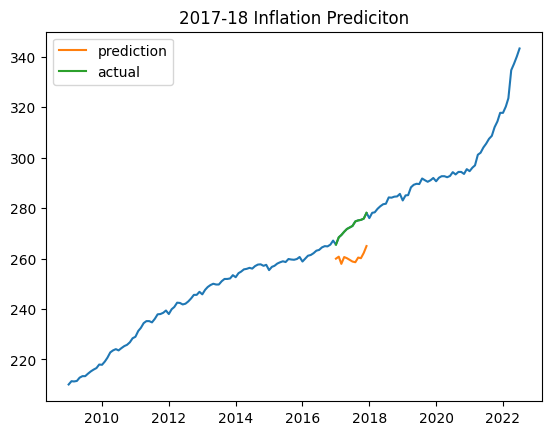

In [34]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.plot(test_results['test_predictions'], label='prediction')
plt.plot(test_results['test_actual'], label='actual')
plt.title('2017-18 Inflation Prediciton')
plt.legend()
#plt.savefig('LSTM_new')



# LSTM 2018-2019

In [35]:
X_train1, y_train1 = X[:84], y[:84]
X_val1, y_val1 = X[84:108], y[84:108]
X_test1, y_test1 = X[108:120], y[108:120]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((84, 11), (84,), (24, 11), (24,), (12, 11), (12,))

In [36]:
y_train1_x = expand_dims(y_train1, -1)
y_train1_x = expand_dims(y_train1_x, -1)

y_train1_x.shape

TensorShape([84, 1, 1])

In [37]:
y_val1_x = expand_dims(y_val1, -1)
y_val1_x = expand_dims(y_val1_x, -1)

In [38]:
X_test1_x = expand_dims(X_test1, -2)

In [39]:
X_train1_x = expand_dims(X_train1, -2)
X_train1_x.shape

TensorShape([84, 1, 11])

In [40]:
X_val1_x = expand_dims(X_val1, -2)
X_val1_x.shape

TensorShape([24, 1, 11])

In [41]:
lr_scheduler = ExponentialDecay(initial_learning_rate=0.001, decay_steps= 10_000, decay_rate=0.7)
adam = Adam(learning_rate=lr_scheduler)
es = EarlyStopping(patience=50, restore_best_weights=True)

In [42]:
normalizer = Normalization()
normalizer.adapt(X_train1_x)

model2 = Sequential()
model2.add(normalizer)

model2.add(LSTM(units = 100, activation='tanh', return_sequences = True))
model2.add(LSTM(units = 50 , activation='tanh', return_sequences = False))

model2.add(Flatten())

model2.add(Dense(100,activation =  'relu'))
model2.add(Dense(50,activation =  'relu'))
model2.add(Dense(25,activation =  'relu'))

model2.add(Dense(1, activation = 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, None, 11)         23        
 ion)                                                            
                                                                 
 lstm_2 (LSTM)               (None, None, 100)         44800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 flatten_1 (Flatten)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                      

In [43]:
model2.compile(loss= mape, optimizer= adam, metrics=['mape'])

In [44]:
model2.fit(X_train1_x, y_train1,batch_size = 32, validation_data=(X_val1_x, y_val1), epochs=10000, callbacks = (es))

Epoch 1/10000
3/3 [==============================] - 4s 437ms/step - loss: 99.9953 - mape: 99.9953 - val_loss: 99.9821 - val_mape: 99.9821
Epoch 2/10000
3/3 [==============================] - 0s 25ms/step - loss: 99.9808 - mape: 99.9808 - val_loss: 99.9657 - val_mape: 99.9657
Epoch 3/10000
3/3 [==============================] - 0s 27ms/step - loss: 99.9632 - mape: 99.9632 - val_loss: 99.9433 - val_mape: 99.9433
Epoch 4/10000
3/3 [==============================] - 0s 26ms/step - loss: 99.9400 - mape: 99.9400 - val_loss: 99.9127 - val_mape: 99.9127
Epoch 5/10000
3/3 [==============================] - 0s 25ms/step - loss: 99.9105 - mape: 99.9105 - val_loss: 99.8733 - val_mape: 99.8733
Epoch 6/10000
3/3 [==============================] - 0s 25ms/step - loss: 99.8732 - mape: 99.8732 - val_loss: 99.8239 - val_mape: 99.8239
Epoch 7/10000
3/3 [==============================] - 0s 26ms/step - loss: 99.8231 - mape: 99.8231 - val_loss: 99.7574 - val_mape: 99.7574
Epoch 8/10000
3/3 [==============

Epoch 61/10000
3/3 [==============================] - 0s 22ms/step - loss: 2.6619 - mape: 2.6619 - val_loss: 3.3299 - val_mape: 3.3299
Epoch 62/10000
3/3 [==============================] - 0s 22ms/step - loss: 2.6013 - mape: 2.6013 - val_loss: 3.0458 - val_mape: 3.0458
Epoch 63/10000
3/3 [==============================] - 0s 21ms/step - loss: 2.5153 - mape: 2.5153 - val_loss: 3.1466 - val_mape: 3.1466
Epoch 64/10000
3/3 [==============================] - 0s 23ms/step - loss: 2.4561 - mape: 2.4561 - val_loss: 2.9979 - val_mape: 2.9979
Epoch 65/10000
3/3 [==============================] - 0s 24ms/step - loss: 2.4109 - mape: 2.4109 - val_loss: 2.9029 - val_mape: 2.9029
Epoch 66/10000
3/3 [==============================] - 0s 24ms/step - loss: 2.3228 - mape: 2.3228 - val_loss: 3.8699 - val_mape: 3.8699
Epoch 67/10000
3/3 [==============================] - 0s 23ms/step - loss: 2.3519 - mape: 2.3519 - val_loss: 3.5669 - val_mape: 3.5669
Epoch 68/10000
3/3 [==============================] - 0

3/3 [==============================] - 0s 22ms/step - loss: 0.8242 - mape: 0.8242 - val_loss: 4.5353 - val_mape: 4.5353
Epoch 122/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.8202 - mape: 0.8202 - val_loss: 3.7035 - val_mape: 3.7035
Epoch 123/10000
3/3 [==============================] - 0s 22ms/step - loss: 0.7320 - mape: 0.7320 - val_loss: 3.6534 - val_mape: 3.6534
Epoch 124/10000
3/3 [==============================] - 0s 22ms/step - loss: 0.6617 - mape: 0.6617 - val_loss: 3.8609 - val_mape: 3.8609
Epoch 125/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.6668 - mape: 0.6668 - val_loss: 3.7931 - val_mape: 3.7931
Epoch 126/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.6274 - mape: 0.6274 - val_loss: 3.7825 - val_mape: 3.7825
Epoch 127/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.6716 - mape: 0.6716 - val_loss: 4.0844 - val_mape: 4.0844
Epoch 128/10000
3/3 [==============================] - 0s 23ms/s

In [45]:
test_prediction1 = list(model2.predict(X_test1_x))

1/1 [==============================] - 1s 783ms/step


In [46]:
test_results1 = pd.DataFrame(columns = ['test_predictions', 'test_actual'])

#train_predictions

test_results1['date'] = list(y_test1.index)
test_results1['test_predictions'] = [x[0] for x in test_prediction1]
test_results1['test_actual'] = list(y_test1)

In [47]:
test_results1

,test_predictions,test_actual,date
0,269.630249,276.0,2018-01-01
1,266.867493,278.1,2018-02-01
2,266.646637,278.3,2018-03-01
3,267.247772,279.7,2018-04-01
4,266.834595,280.7,2018-05-01
5,266.673462,281.5,2018-06-01
6,267.234619,281.7,2018-07-01
7,265.907959,284.2,2018-08-01
8,266.322388,284.1,2018-09-01
9,262.966614,284.5,2018-10-01


In [48]:
test_results1.set_index('date', inplace=True)

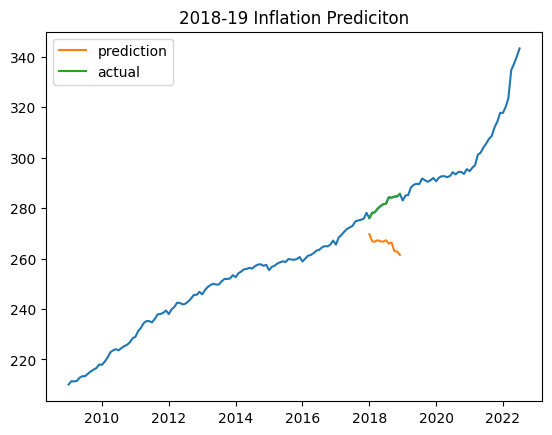

In [49]:
plt.plot(y)
plt.plot(test_results1['test_predictions'], label='prediction')
plt.plot(test_results1['test_actual'], label='actual')
plt.title('2018-19 Inflation Prediciton')
plt.legend()

# LSTM 2019-2020

In [50]:
X_train2, y_train2 = X[:96], y[:96]
X_val2, y_val2 = X[96:120], y[96:120]
X_test2, y_test2 = X[120:132], y[120:132]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((96, 11), (96,), (24, 11), (24,), (12, 11), (12,))

In [51]:
y_train2_x = expand_dims(y_train2, -1)
y_train2_x = expand_dims(y_train2_x, -1)

y_train2_x.shape

TensorShape([96, 1, 1])

In [52]:
y_val2_x = expand_dims(y_val2, -1)
y_val2_x = expand_dims(y_val2_x, -1)

In [53]:
X_test2_x = expand_dims(X_test2, -2)

In [54]:
X_train2_x = expand_dims(X_train2, -2)
X_train2_x.shape

TensorShape([96, 1, 11])

In [55]:
X_val2_x = expand_dims(X_val2, -2)
X_val2_x.shape

TensorShape([24, 1, 11])

In [56]:
normalizer = Normalization()
normalizer.adapt(X_train2_x)

model3 = Sequential()
model3.add(normalizer)

model3.add(LSTM(units = 100, activation='tanh', return_sequences = True))
model3.add(LSTM(units = 50 , activation='tanh', return_sequences = False))

model3.add(Flatten())

model3.add(Dense(100,activation =  'relu'))
model3.add(Dense(50,activation =  'relu'))
model3.add(Dense(25,activation =  'relu'))

model3.add(Dense(1, activation = 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, None, 11)         23        
 ion)                                                            
                                                                 
 lstm_4 (LSTM)               (None, None, 100)         44800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 flatten_2 (Flatten)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 100)               5100      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                      

In [57]:
model3.compile(loss= mape, optimizer= adam, metrics=['mape'])

In [58]:
model3.fit(X_train2_x, y_train2,batch_size = 32, validation_data=(X_val2_x, y_val2), epochs=10000, callbacks = (es))

Epoch 1/10000
3/3 [==============================] - 4s 397ms/step - loss: 99.9921 - mape: 99.9921 - val_loss: 99.9586 - val_mape: 99.9586
Epoch 2/10000
3/3 [==============================] - 0s 25ms/step - loss: 99.9423 - mape: 99.9423 - val_loss: 99.8464 - val_mape: 99.8464
Epoch 3/10000
3/3 [==============================] - 0s 25ms/step - loss: 99.8245 - mape: 99.8245 - val_loss: 99.5630 - val_mape: 99.5630
Epoch 4/10000
3/3 [==============================] - 0s 23ms/step - loss: 99.5522 - mape: 99.5522 - val_loss: 98.8228 - val_mape: 98.8228
Epoch 5/10000
3/3 [==============================] - 0s 24ms/step - loss: 98.9265 - mape: 98.9265 - val_loss: 97.1153 - val_mape: 97.1153
Epoch 6/10000
3/3 [==============================] - 0s 23ms/step - loss: 97.5683 - mape: 97.5683 - val_loss: 93.4772 - val_mape: 93.4772
Epoch 7/10000
3/3 [==============================] - 0s 23ms/step - loss: 94.8603 - mape: 94.8603 - val_loss: 86.8516 - val_mape: 86.8516
Epoch 8/10000
3/3 [==============

3/3 [==============================] - 0s 20ms/step - loss: 0.7089 - mape: 0.7089 - val_loss: 4.2971 - val_mape: 4.2971
Epoch 62/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.7788 - mape: 0.7788 - val_loss: 4.4234 - val_mape: 4.4234
Epoch 63/10000
3/3 [==============================] - 0s 22ms/step - loss: 0.6860 - mape: 0.6860 - val_loss: 4.4843 - val_mape: 4.4843
Epoch 64/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.7000 - mape: 0.7000 - val_loss: 4.9001 - val_mape: 4.9001
Epoch 65/10000
3/3 [==============================] - 0s 24ms/step - loss: 0.7775 - mape: 0.7775 - val_loss: 4.6408 - val_mape: 4.6408
Epoch 66/10000
3/3 [==============================] - 0s 21ms/step - loss: 0.6668 - mape: 0.6668 - val_loss: 4.2227 - val_mape: 4.2227
Epoch 67/10000
3/3 [==============================] - 0s 23ms/step - loss: 0.7868 - mape: 0.7868 - val_loss: 4.6142 - val_mape: 4.6142
Epoch 68/10000
3/3 [==============================] - 0s 21ms/step - l

In [59]:
test_prediction2 = list(model3.predict(X_test2_x))


1/1 [==============================] - 1s 781ms/step


In [60]:
test_results2 = pd.DataFrame(columns = ['test_predictions', 'test_actual'])

#train_predictions

test_results2['date'] = list(y_test2.index)
test_results2['test_predictions'] = [x[0] for x in test_prediction2]
test_results2['test_actual'] = list(y[120:132])

In [61]:
test_results2.set_index('date', inplace=True)

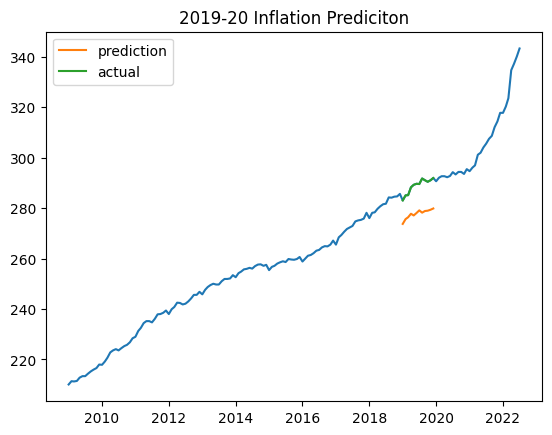

In [62]:
plt.plot(y)
plt.plot(test_results2['test_predictions'], label='prediction')
plt.plot(test_results2['test_actual'], label='actual')
plt.title('2019-20 Inflation Prediciton')
plt.legend()
#plt.savefig('LSTM_2019-20')

# LSTM 2020-2021

In [63]:
X[132:144]

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_Gas,GBP_IRS_2y,GBP_IRS_10y,Nationwide_HPI
Date,,,,,,,,,,,
2020-01-01,49.021977,37.434634,1.298861,1.160843,7036.697727,2497.268828,3060.333106,7.781994,0.692330,0.710236,430.7
2020-02-01,42.943990,35.965277,1.291857,1.164014,6796.644286,2501.024605,3019.880708,7.418630,0.683318,0.645300,431.1
2020-03-01,27.211757,25.801736,1.239504,1.111822,5813.382174,2243.053117,2631.283557,6.975790,0.496927,0.614401,438.0
2020-04-01,21.072957,17.991584,1.263773,1.139632,6002.315714,2370.656764,2666.200693,5.995653,0.470125,0.524649,444.7
2020-05-01,25.990237,28.047836,1.247080,1.123495,6134.460000,2450.288506,2722.792714,4.950512,0.327838,0.459777,436.7
2020-06-01,32.338286,31.462164,1.260819,1.118319,6267.593333,2475.319143,2906.093329,5.429804,0.243187,0.453932,431.7
2020-07-01,33.762927,31.986664,1.280167,1.112688,6244.110000,2520.160305,2990.676103,5.291466,0.139427,0.406336,440.7
2020-08-01,34.536521,31.706150,1.303548,1.117148,6163.494211,2569.477068,2952.475053,6.921193,0.104939,0.457958,447.1
2020-09-01,32.488230,30.814480,1.288886,1.106245,6078.599545,2558.413712,2949.601847,8.556717,0.066389,0.432595,451.1


In [64]:
X_train3, y_train3 = X[:108], y[:108]
X_val3, y_val3 = X[108:132], y[108:132]
X_test3, y_test3 = X[132:144], y[132:144]
X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape

((108, 11), (108,), (24, 11), (24,), (12, 11), (12,))

In [65]:
y_train3_x = expand_dims(y_train3, -1)
y_train3_x = expand_dims(y_train3_x, -1)

y_train3_x.shape

TensorShape([108, 1, 1])

In [66]:
y_val3_x = expand_dims(y_val3, -1)
y_val3_x = expand_dims(y_val3_x, -1)

In [67]:
X_test3_x = expand_dims(X_test3, -2)

In [68]:
X_train3_x = expand_dims(X_train3, -2)
X_train3_x.shape

TensorShape([108, 1, 11])

In [69]:
X_val3_x = expand_dims(X_val3, -2)
X_val3_x.shape

TensorShape([24, 1, 11])

In [70]:
normalizer = Normalization()
normalizer.adapt(X_train3_x)

model4 = Sequential()
model4.add(normalizer)

model4.add(LSTM(units = 100, activation='tanh', return_sequences = True))
model4.add(LSTM(units = 50 , activation='tanh', return_sequences = False))

model4.add(Flatten())

model4.add(Dense(100,activation =  'relu'))
model4.add(Dense(50,activation =  'relu'))
model4.add(Dense(25,activation =  'relu'))

model4.add(Dense(1, activation = 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, None, 11)         23        
 ion)                                                            
                                                                 
 lstm_6 (LSTM)               (None, None, 100)         44800     
                                                                 
 lstm_7 (LSTM)               (None, 50)                30200     
                                                                 
 flatten_3 (Flatten)         (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 100)               5100      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                      

In [71]:
model4.compile(loss= mape, optimizer= adam, metrics=['mape'])

In [72]:
model4.fit(X_train3_x, y_train3,batch_size = 32, validation_data=(X_val3_x, y_val3), epochs=10000, callbacks = (es))

Epoch 1/10000
4/4 [==============================] - 5s 315ms/step - loss: 99.9771 - mape: 99.9771 - val_loss: 99.9111 - val_mape: 99.9111
Epoch 2/10000
4/4 [==============================] - 0s 20ms/step - loss: 99.7972 - mape: 99.7972 - val_loss: 99.6103 - val_mape: 99.6103
Epoch 3/10000
4/4 [==============================] - 0s 19ms/step - loss: 99.1383 - mape: 99.1383 - val_loss: 98.5702 - val_mape: 98.5702
Epoch 4/10000
4/4 [==============================] - 0s 18ms/step - loss: 96.6223 - mape: 96.6223 - val_loss: 95.7757 - val_mape: 95.7757
Epoch 5/10000
4/4 [==============================] - 0s 18ms/step - loss: 89.0518 - mape: 89.0518 - val_loss: 89.5031 - val_mape: 89.5031
Epoch 6/10000
4/4 [==============================] - 0s 17ms/step - loss: 69.5361 - mape: 69.5361 - val_loss: 77.2417 - val_mape: 77.2417
Epoch 7/10000
4/4 [==============================] - 0s 19ms/step - loss: 42.9987 - mape: 42.9987 - val_loss: 55.5874 - val_mape: 55.5874
Epoch 8/10000
4/4 [==============

4/4 [==============================] - 0s 15ms/step - loss: 1.0320 - mape: 1.0320 - val_loss: 4.0834 - val_mape: 4.0834
Epoch 62/10000
4/4 [==============================] - 0s 16ms/step - loss: 0.7875 - mape: 0.7875 - val_loss: 3.6802 - val_mape: 3.6802
Epoch 63/10000
4/4 [==============================] - 0s 15ms/step - loss: 0.8032 - mape: 0.8032 - val_loss: 3.8730 - val_mape: 3.8730
Epoch 64/10000
4/4 [==============================] - 0s 17ms/step - loss: 0.7273 - mape: 0.7273 - val_loss: 3.8850 - val_mape: 3.8850


In [73]:
test_prediction3 = list(model4.predict(X_test3_x))


1/1 [==============================] - 1s 796ms/step


In [74]:
test_results3 = pd.DataFrame(columns = ['test_predictions', 'test_actual'])

#train_predictions

test_results3['date'] = list(y_test3.index)
test_results3['test_predictions'] = [x[0] for x in test_prediction3]
test_results3['test_actual'] = list(y_test3)

In [75]:
test_results3.set_index('date', inplace=True)

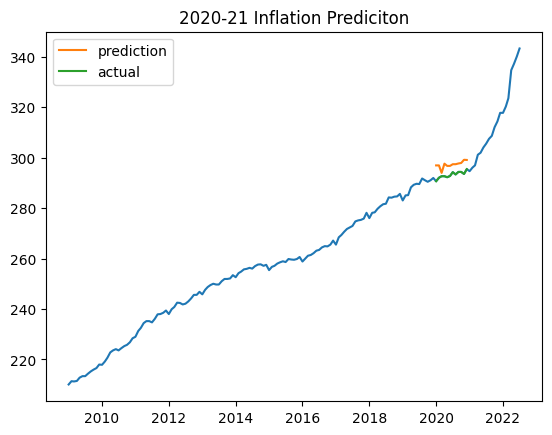

In [76]:
plt.plot(y)
plt.plot(test_results3['test_predictions'], label='prediction')
plt.plot(test_results3['test_actual'], label='actual')
plt.title('2020-21 Inflation Prediciton')
plt.legend()
plt.savefig('LSTM_2020-21')

# LSTM 2021-2022

In [77]:
X[:165]

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_Gas,GBP_IRS_2y,GBP_IRS_10y,Nationwide_HPI
Date,,,,,,,,,,,
2009-01-01,30.903838,33.424333,1.479027,1.099905,4308.390000,596.071497,2135.982324,12.472805,2.122545,3.757500,300.2
2009-02-01,29.393166,33.617553,1.492643,1.120824,4232.114762,570.410394,2020.716905,9.467866,2.129905,3.798333,294.7
2009-03-01,31.733352,36.826152,1.494241,1.097877,4107.840909,566.393975,2029.160819,8.064295,2.142045,3.872500,301.1
2009-04-01,33.990786,36.012519,1.511936,1.125327,4259.890500,588.042125,2119.383029,7.762397,2.143250,3.935500,302.9
2009-05-01,37.524515,38.801542,1.561252,1.131686,4434.719500,582.718727,2164.120107,7.757394,2.031900,3.917500,307.2
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,538.4
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,541.8
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,541.0


In [78]:
X_train4, y_train4 = X[:132], y[:132]
X_val4, y_val4 = X[132:156], y[132:156]
X_test4, y_test4 = X[156:165], y[156:165]
X_train4.shape, y_train4.shape, X_val4.shape, y_val4.shape, X_test4.shape, y_test4.shape

((132, 11), (132,), (24, 11), (24,), (9, 11), (9,))

In [79]:
y_train4_x = expand_dims(y_train4, -1)
y_train4_x = expand_dims(y_train4_x, -1)

y_train4_x.shape

TensorShape([132, 1, 1])

In [80]:
y_val4_x = expand_dims(y_val4, -1)
y_val4_x = expand_dims(y_val4_x, -1)

In [81]:
X_test4_x = expand_dims(X_test4, -2)

In [82]:
X_train4_x = expand_dims(X_train4, -2)
X_train4_x.shape

TensorShape([132, 1, 11])

In [83]:
X_val4_x = expand_dims(X_val4, -2)
X_val4_x.shape

TensorShape([24, 1, 11])

In [84]:
normalizer = Normalization()
normalizer.adapt(X_train4_x)

model5 = Sequential()
model5.add(normalizer)

model5.add(LSTM(units = 100, activation='tanh', return_sequences = True))
model5.add(LSTM(units = 50 , activation='tanh', return_sequences = False))

model5.add(Flatten())

model5.add(Dense(100,activation =  'relu'))
model5.add(Dense(50,activation =  'relu'))
model5.add(Dense(25,activation =  'relu'))

model5.add(Dense(1, activation = 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, None, 11)         23        
 ion)                                                            
                                                                 
 lstm_8 (LSTM)               (None, None, 100)         44800     
                                                                 
 lstm_9 (LSTM)               (None, 50)                30200     
                                                                 
 flatten_4 (Flatten)         (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                      

In [85]:
model5.compile(loss= mape, optimizer= adam, metrics=['mape'])

In [86]:
model5.fit(X_train4_x, y_train4,batch_size = 32, validation_data=(X_val4_x, y_val4), epochs=10000, callbacks = (es))

Epoch 1/10000
5/5 [==============================] - 5s 248ms/step - loss: 99.9693 - mape: 99.9693 - val_loss: 99.8518 - val_mape: 99.8518
Epoch 2/10000
5/5 [==============================] - 0s 17ms/step - loss: 99.6394 - mape: 99.6394 - val_loss: 99.0200 - val_mape: 99.0200
Epoch 3/10000
5/5 [==============================] - 0s 19ms/step - loss: 97.7091 - mape: 97.7091 - val_loss: 95.6598 - val_mape: 95.6598
Epoch 4/10000
5/5 [==============================] - 0s 18ms/step - loss: 89.2303 - mape: 89.2303 - val_loss: 85.6272 - val_mape: 85.6272
Epoch 5/10000
5/5 [==============================] - 0s 15ms/step - loss: 63.9343 - mape: 63.9343 - val_loss: 62.3165 - val_mape: 62.3165
Epoch 6/10000
5/5 [==============================] - 0s 14ms/step - loss: 36.8268 - mape: 36.8268 - val_loss: 15.2233 - val_mape: 15.2233
Epoch 7/10000
5/5 [==============================] - 0s 13ms/step - loss: 17.9083 - mape: 17.9083 - val_loss: 18.9977 - val_mape: 18.9977
Epoch 8/10000
5/5 [==============

5/5 [==============================] - 0s 14ms/step - loss: 1.5085 - mape: 1.5085 - val_loss: 4.3378 - val_mape: 4.3378
Epoch 62/10000
5/5 [==============================] - 0s 13ms/step - loss: 1.0666 - mape: 1.0666 - val_loss: 6.2235 - val_mape: 6.2235
Epoch 63/10000
5/5 [==============================] - 0s 13ms/step - loss: 1.2044 - mape: 1.2044 - val_loss: 4.5685 - val_mape: 4.5685
Epoch 64/10000
5/5 [==============================] - 0s 12ms/step - loss: 1.0626 - mape: 1.0626 - val_loss: 4.6139 - val_mape: 4.6139
Epoch 65/10000
5/5 [==============================] - 0s 13ms/step - loss: 1.2506 - mape: 1.2506 - val_loss: 6.4298 - val_mape: 6.4298
Epoch 66/10000
5/5 [==============================] - 0s 16ms/step - loss: 1.3366 - mape: 1.3366 - val_loss: 4.6457 - val_mape: 4.6457


In [87]:
test_prediction4 = list(model5.predict(X_test4_x))
test_prediction4


1/1 [==============================] - 1s 903ms/step


[array([204.44473], dtype=float32),
 array([234.52707], dtype=float32),
 array([247.2835], dtype=float32),
 array([246.1918], dtype=float32),
 array([248.52383], dtype=float32),
 array([252.56546], dtype=float32),
 array([251.78424], dtype=float32),
 array([253.58572], dtype=float32),
 array([4.680316], dtype=float32)]

In [88]:
test_results4 = pd.DataFrame(columns = ['test_predictions', 'test_actual'])

#train_predictions

test_results4['date'] = list(y_test4.index)
test_results4['test_predictions'] = [x[0] for x in test_prediction4]
test_results4['test_actual'] = list(y_test4)

In [89]:
test_results4.set_index('date', inplace=True)

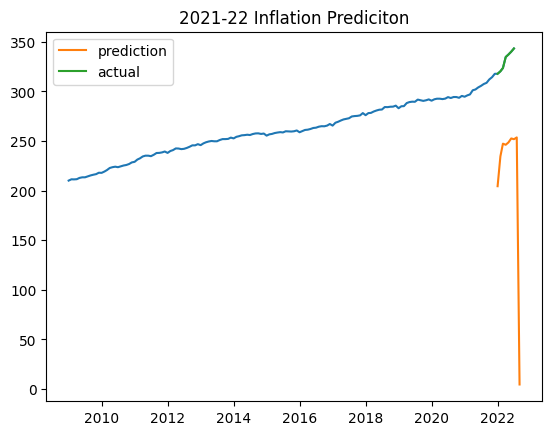

In [90]:
plt.plot(y)
plt.plot(test_results4['test_predictions'], label='prediction')
plt.plot(test_results4['test_actual'], label='actual')
plt.title('2021-22 Inflation Prediciton')
plt.legend()

# LSTM 2022-

In [91]:
X[159:165]

,Brent_Crude_GBP,WTI_Crude_GBP,GBP Curncy,GBPEUR Curncy,UKX Index,SPX Index,SX5E Index,Natural_Gas,GBP_IRS_2y,GBP_IRS_10y,Nationwide_HPI
Date,,,,,,,,,,,
2022-04-01,82.294714,78.884404,1.287045,1.194540,7475.842222,3390.642475,3202.490777,86.613133,2.365979,2.085100,533.9
2022-05-01,89.748267,85.128666,1.247484,1.178074,7472.767778,3274.256696,3179.554466,81.073170,2.538121,2.240542,538.4
2022-06-01,95.251442,87.836565,1.233611,1.167758,7238.188421,3172.340166,3058.969505,96.746393,2.933563,2.626558,541.8
2022-07-01,85.363871,80.415504,1.231479,1.184589,7303.865263,3298.689210,3082.959231,128.688654,2.700779,2.302258,541.0
2022-08-01,80.656541,78.913331,1.211816,1.181732,7453.987222,3446.779300,3131.457852,180.082147,3.368889,2.688500,546.1
2022-09-01,73.474167,80.706056,1.272420,1.180400,7403.016000,3300.260920,3208.537784,93.341821,2.475340,2.155940,NaN


In [92]:
X_train5, y_train5 = X[:156], y[:156]
X_val5, y_val5 = X[156:163], y[156:163]
X_test5, y_test5 = X[163:164], y[163:164]
X_train5.shape, y_train5.shape, X_val5.shape, y_val5.shape, X_test5.shape, y_test5.shape

((156, 11), (156,), (7, 11), (7,), (1, 11), (1,))

In [93]:
y_train5_x = expand_dims(y_train5, -1)
y_train5_x = expand_dims(y_train5_x, -1)

y_train5_x.shape

TensorShape([156, 1, 1])

In [94]:
y_val5_x = expand_dims(y_val5, -1)
y_val5_x = expand_dims(y_val5_x, -1)

In [95]:
X_test5_x = expand_dims(X_test5, -2)

In [96]:
X_train5_x = expand_dims(X_train5, -2)
X_train5_x.shape

TensorShape([156, 1, 11])

In [97]:
X_val5_x = expand_dims(X_val5, -2)
X_val5_x.shape

TensorShape([7, 1, 11])

In [98]:
normalizer = Normalization()
normalizer.adapt(X_train5_x)

model6 = Sequential()
model6.add(normalizer)

model6.add(LSTM(units = 110, activation='tanh', return_sequences = True))
model6.add(LSTM(units = 50 , activation='tanh', return_sequences = False))

model6.add(Flatten())

model6.add(Dense(100,activation =  'relu'))
model6.add(Dense(50,activation =  'relu'))
model6.add(Dense(25,activation =  'relu'))
model6.add(Dense(25,activation =  'relu'))
model6.add(Dense(12,activation =  'relu'))




model6.add(Dense(1, activation = 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, None, 11)         23        
 ion)                                                            
                                                                 
 lstm_10 (LSTM)              (None, None, 110)         53680     
                                                                 
 lstm_11 (LSTM)              (None, 50)                32200     
                                                                 
 flatten_5 (Flatten)         (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 100)               5100      
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                      

In [99]:
model6.compile(loss= mape, optimizer= adam, metrics=['mape'])

In [100]:
model6.fit(X_train5_x, y_train5, batch_size = 16, validation_data=(X_val5_x, y_val5), epochs=10000, callbacks = (es))

Epoch 1/10000
10/10 [==============================] - 5s 170ms/step - loss: 99.7188 - mape: 99.7188 - val_loss: 98.5804 - val_mape: 98.5804
Epoch 2/10000
10/10 [==============================] - 0s 14ms/step - loss: 83.9688 - mape: 83.9688 - val_loss: 46.2703 - val_mape: 46.2703
Epoch 3/10000
10/10 [==============================] - 0s 10ms/step - loss: 23.5779 - mape: 23.5779 - val_loss: 53.7956 - val_mape: 53.7956
Epoch 4/10000
10/10 [==============================] - 0s 10ms/step - loss: 15.6294 - mape: 15.6294 - val_loss: 48.8892 - val_mape: 48.8892
Epoch 5/10000
10/10 [==============================] - 0s 10ms/step - loss: 13.3412 - mape: 13.3412 - val_loss: 27.2787 - val_mape: 27.2787
Epoch 6/10000
10/10 [==============================] - 0s 11ms/step - loss: 9.9685 - mape: 9.9685 - val_loss: 29.5880 - val_mape: 29.5880
Epoch 7/10000
10/10 [==============================] - 0s 10ms/step - loss: 6.5980 - mape: 6.5980 - val_loss: 16.3217 - val_mape: 16.3217
Epoch 8/10000
10/10 [==

10/10 [==============================] - 0s 11ms/step - loss: 0.9983 - mape: 0.9983 - val_loss: 12.7890 - val_mape: 12.7890
Epoch 61/10000
10/10 [==============================] - 0s 10ms/step - loss: 1.3008 - mape: 1.3008 - val_loss: 12.4216 - val_mape: 12.4216
Epoch 62/10000
10/10 [==============================] - 0s 9ms/step - loss: 0.8394 - mape: 0.8394 - val_loss: 13.1918 - val_mape: 13.1918
Epoch 63/10000
10/10 [==============================] - 0s 10ms/step - loss: 1.0314 - mape: 1.0314 - val_loss: 13.5522 - val_mape: 13.5522
Epoch 64/10000
10/10 [==============================] - 0s 10ms/step - loss: 0.9077 - mape: 0.9077 - val_loss: 14.8841 - val_mape: 14.8841
Epoch 65/10000
10/10 [==============================] - 0s 11ms/step - loss: 0.7375 - mape: 0.7375 - val_loss: 14.9495 - val_mape: 14.9495
Epoch 66/10000
10/10 [==============================] - 0s 10ms/step - loss: 0.9873 - mape: 0.9873 - val_loss: 15.8813 - val_mape: 15.8813
Epoch 67/10000
10/10 [=====================

In [101]:
test_prediction5 = list(model6.predict(X_test5_x))


1/1 [==============================] - 1s 789ms/step


In [102]:
test_prediction5

[array([332.37424], dtype=float32)]

In [103]:
y_test5

Date
2022-08-01   NaN
Name: RPI, dtype: float64

In [104]:
# res = []
# for x in range(1):
#     val = pd.to_datetime(pd.DataFrame(y).iloc[-x,:0]).name
#     res.append(val)

In [105]:
# res = res[1:]

In [106]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [107]:
# list(y_test5[:-1])

In [108]:
# future_vals = []
# for x in res:
#     future_date = x + relativedelta(months=1)
#     future_vals.append(future_date)

In [109]:
# future_vals

In [110]:
test_results5 = pd.DataFrame(columns = ['test_predictions', 'test_actual'])

#train_predictions

test_results5['date'] = y_test5.index
test_results5['test_predictions'] = [x[0] for x in test_prediction5]
print(test_results5['date'])

0   2022-08-01
Name: date, dtype: datetime64[ns]


In [111]:
test_results5.set_index('date', inplace=True)

In [112]:
print(test_results5)

            test_predictions test_actual
date                                    
2022-08-01        332.374237         NaN


In [115]:
y

Date
2009-01-01    210.1
2009-02-01    211.4
2009-03-01    211.3
2009-04-01    211.5
2009-05-01    212.8
              ...  
2022-05-01    337.1
2022-06-01    340.0
2022-07-01    343.2
2022-08-01      NaN
2022-09-01      NaN
Name: RPI, Length: 165, dtype: float64

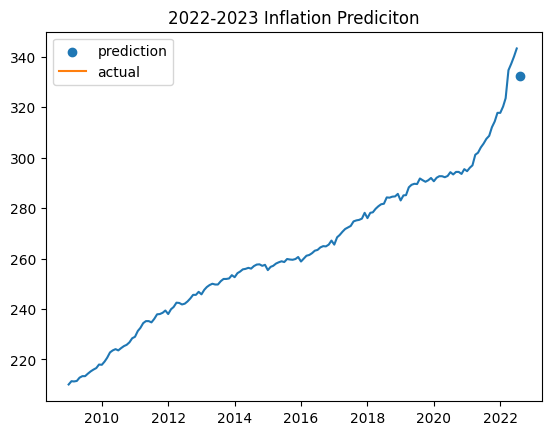

In [113]:
plt.plot(y)
plt.scatter([y_test5.index], test_results5['test_predictions'], label='prediction')
#plt.plot(test_results5['test_predictions'], label='prediction')
plt.plot(test_results5['test_actual'], label='actual')
plt.title('2022-2023 Inflation Prediciton')
plt.legend()
plt.savefig('LSTM_Pred_5th_run')

In [121]:
import plotly.express as px
import plotly.graph_objects as go

In [123]:
[y_test5.index]

[DatetimeIndex(['2022-08-01'], dtype='datetime64[ns]', name='Date', freq=None)]

In [124]:
 test_results5['test_predictions']

date
2022-08-01    332.374237
Name: test_predictions, dtype: float32

In [125]:
fig2

In [135]:
test_results5['test_predictions']

date
2022-08-01    332.374237
Name: test_predictions, dtype: float32

In [134]:
y_test5

Date
2022-08-01   NaN
Name: RPI, dtype: float64

In [140]:
y

Date
2009-01-01    210.1
2009-02-01    211.4
2009-03-01    211.3
2009-04-01    211.5
2009-05-01    212.8
              ...  
2022-05-01    337.1
2022-06-01    340.0
2022-07-01    343.2
2022-08-01      NaN
2022-09-01      NaN
Name: RPI, Length: 165, dtype: float64

In [143]:
test_results5["test_predictions"]

date
2022-08-01    332.374237
Name: test_predictions, dtype: float32

In [147]:
fig1 = px.line(y)
fig2 = px.scatter(test_results5["test_predictions"], color_continuous_scale='Inferno')
go.Figure(data=fig1.data + fig2.data)
